#                          BASIC SENTIMENT ANALYSIS

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

IMPORTING DATASET

In [3]:
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 127s 7us/step


In [4]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print(y_train[0])

1


In [6]:
class_names = ["Negative","Positive"]

In [14]:
word_index = imdb.get_word_index()  # words as keys and their token as values
print(word_index['hi'])

6593


DECODING THE REVIEWS

In [23]:
reverse_word_index = dict((key,value) for value,key in word_index.items())
#created a dict of key value pairs as in word_index
#function created for decoding the reviews from the text
def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

In [29]:
decode(x_train[1]) #prints out the words used but not in proper order

"the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them "

In [30]:
def show_len():
    print("Length of 1st training example ",len(x_train[0]))
    print("Length of 2nd training example ",len(x_train[1]))
    print("Length of 1st test example ",len(x_test[0]))
    print("Length of 2nd test example ",len(x_test[1]))

show_len()   #clearly all of them are of different length so we have to do padding

Length of 1st training example  218
Length of 2nd training example  189
Length of 1st test example  68
Length of 2nd test example  260


PADDING THE EXAMPLES

In [33]:
word_index['the']  #padded value

1

In [31]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train , value=word_index['the'],padding='post',maxlen=256)
x_test = pad_sequences(x_test , value=word_index['the'],padding='post',maxlen=256)

In [32]:
show_len()  #all lengths are same now

Length of 1st training example  256
Length of 2nd training example  256
Length of 1st test example  256
Length of 2nd test example  256


In [34]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

WORD EMBEDDINGS

In [35]:
# in one hot encoding the algorithm does not understand feature correlation at all
# each word is unique entity for it
# in word embeddings the algorithm sort of understands related words that can give a sense of context
# word embeddings are basically feature representations for the various games

CREATING AND TRAINING THE MODEL

In [38]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([
    Embedding(10000,16),   # embedding can only be used as 1st layer, arguments are vocab size and no. of features
    GlobalAveragePooling1D(),  #converts 10000x16 to 16x16 dimension vector for each batch then fed into the dense layer
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')  #output layer
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [39]:
# callback used to logout a dot as I train the model, not the default output
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end='.'))
E = 10 # no. of epochs

h = model.fit(
    x_train,y_train,
    validation_split=0.2,
    epochs = E,
    callbacks = [simple_log],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.

PREDICTIONS AND EVALUATION

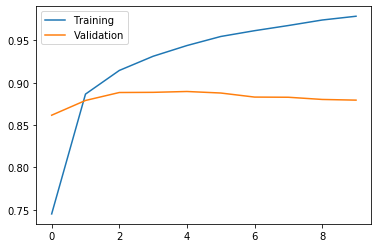

In [46]:
%matplotlib inline  
plt.plot(range(E),h.history['accuracy'], label='Training')
plt.plot(range(E),h.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [47]:
# model performs slightly worse on the validation data as it is trained on training data
# this is called overfitting

In [51]:
loss, acc = model.evaluate(x_test,y_test)
print('Test set Accuracy: ',acc*100)

25000/25000 [==============================] - 1s 30us/sample - loss: 0.4346 - accuracy: 0.8640
Test set Accuracy:  86.40000224113464


In [60]:
p = model.predict(np.expand_dims(x_test[0],axis=0)) # prediction for the first value of x_test
print(class_names[np.argmax(p[0])])

Negative


In [61]:
decode(x_test[0])  # this does seem to be a negative review

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the